In [1]:
pwd

'/Users/jminich/Desktop/LR_MG_REVISION/LR-MG_Data/Notebooks-analysis'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set(style="whitegrid")

In [3]:
ls

2mag_final.csv
Fig1E_LR-MG-metaanalysis.ipynb
Fig2_&_SuppFig3_analysis_MAG.ipynb
Fig5_ANI_time-series_cMAG-278.ipynb
Figure_2_ecology.ipynb
Functional_Pangenome_analysis_PIRATE-Scoary2.md
Functional_Pangenome_analysis_PIRATE-Scoary2_final.md
ML_function_r1M_PAV_lg.ipynb
ML_function_r1M_relabund_lg.ipynb
ML_taxa_PAV__linear_growth.ipynb
ML_taxa_relabun__linear_growth.ipynb
ML_venn_results.ipynb
Supp_fig1_a_extraction_yield.ipynb
Supp_fig1_seq-stats.ipynb
Supp_fig1_sequencing_QC.ipynb
Supp_fig4_SRvsLR_cost_analysis.ipynb
grouped_raw.csv


In [4]:
cMAG=pd.read_csv('../Data_files/rST_fig5_278_genomes_ANI_final_table.csv')

In [5]:

# 95% subset: for a given set of ANI comparisons only same species are compared - thus any instances where the same annotated species name has an ANI difference of greater than 5% from 100% or <95% are excluded...this included excluding 2 Bifidobacterium (new species), a set of 3 Prevotella (new species), a set of 4 Faecalibacterium (new species),
# additional exclusions: The A1 sample (first time point of HSID A) had two cMAG Faecalibacterium prausnitzii_G... thus we choose the first one as the reference
# additional exclusions: The F1 sample (first time point of HSID F) had two cMAG Ecoli... thus we choose the first one as the reference
# a total of 267 genomes (of the 278 original) are included in the analysis which includes a total of 73 unique instances where a cMAG species was present in 3 or more timepoints in an individual (out of the original 75)
cMAG95=cMAG.loc[cMAG['final_include_95']==1]
cMAG95.shape

(260, 321)

<Figure size 500x500 with 0 Axes>

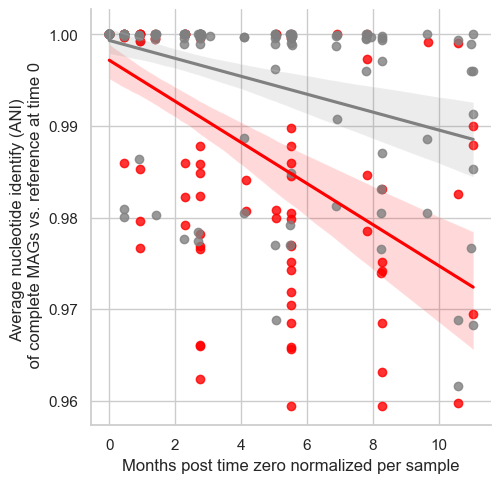

In [6]:
# 95%: for a given set of ANI comparisons only same species are compared
plt.figure(figsize=(5,5))
lplot=sns.lmplot(data=cMAG95, x="months_post", y="compare_ANI", hue="linear_growth_rw", palette=['red', 'grey'],legend=False)
lplot.set_axis_labels("Months post time zero normalized per sample", 
                      "Average nucleotide identify (ANI) \n of complete MAGs vs. reference at time 0")
#plt.savefig("ANI_time.png", dpi=600, bbox_inches="tight")

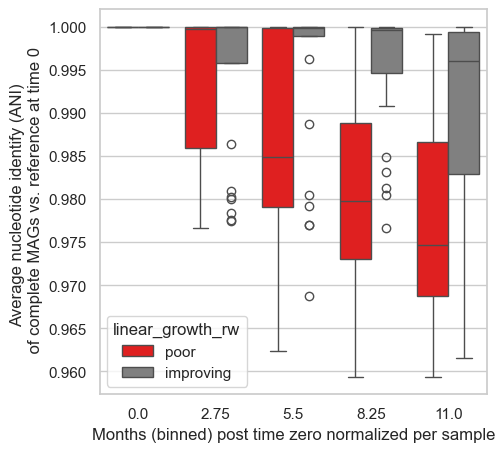

In [7]:
# 95%: for a given set of ANI comparisons only same species are compared
# timepoints binned in 4 binned time frames 11months / 4 = 0 (n=72) 0-2.75 months (n=53), 2.76-5.5 months (n=56), 5.6-8.25 months (n=52), 8.26-11.04 months (n=34)
plt.figure(figsize=(5,5))
figbox=sns.boxplot(data=cMAG95, x="month_bin_4", y="compare_ANI",hue="linear_growth_rw", palette=['red', 'grey'])
figbox.set_xlabel('Months (binned) post time zero normalized per sample')
figbox.set_ylabel('Average nucleotide identify (ANI) \n of complete MAGs vs. reference at time 0')
plt.savefig("../Figures/Fig5B_ANI_time_bin.png", dpi=600, bbox_inches="tight")


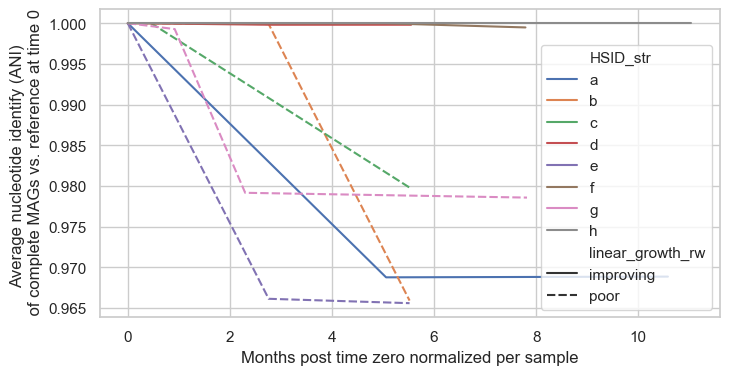

In [10]:
# example of the only Species found across all 8 participants with 3 or more time points
plt.figure(figsize=(8,4))
Dialister=cMAG95.loc[cMAG95['species']=="s__Dialister sp000434475"]
dial=sns.lineplot(data=Dialister, x="months_post_v", y="compare_ANI", style="linear_growth_rw", hue="HSID_str")

dial.set_xlabel('Months post time zero normalized per sample')
dial.set_ylabel('Average nucleotide identify (ANI) \n of complete MAGs vs. reference at time 0')
plt.savefig("../Figures/Fig5C_Dialister.png", dpi=600, bbox_inches="tight")


In [13]:
# Preparing groups for statistical comparison (are there differences in ANI vs. time 0 across the genomes for a given time point bin)
group0=cMAG95[cMAG95['month_bin_4']==0]
group1=cMAG95[cMAG95['month_bin_4']==2.75]
group2=cMAG95[cMAG95['month_bin_4']==5.5]
group3=cMAG95[cMAG95['month_bin_4']==8.25]
group4=cMAG95[cMAG95['month_bin_4']==11]

print(group0.shape) #73
print(group1.shape) #53
print(group2.shape) #54
print(group3.shape) #47
print(group4.shape) #33

(73, 321)
(53, 321)
(54, 321)
(47, 321)
(33, 321)


In [23]:
#stats on linear growth
import numpy as np
from scipy.stats import mannwhitneyu

g0_badLG=group0[group0['linear_growth']=='bad']
g0_goodLG=group0[group0['linear_growth']=='good']

u_stat, p_value=mannwhitneyu(g0_badLG['compare_ANI'], g0_goodLG['compare_ANI'], alternative='two-sided')
print(f"U-statistic: {u_stat:.4f}")
print(f"P-value: {p_value:.4f}")

g0_badLG['compare_ANI'].shape #34
g0_goodLG['compare_ANI'].shape #39

U-statistic: 663.0000
P-value: 1.0000


(39,)

In [22]:
#group 1
g1_badLG=group1[group1['linear_growth']=='bad']
g1_goodLG=group1[group1['linear_growth']=='good']

u_stat, p_value=mannwhitneyu(g1_badLG['compare_ANI'], g1_goodLG['compare_ANI'], alternative='two-sided')
print(f"U-statistic: {u_stat:.4f}")
print(f"P-value: {p_value:.4f}")

g1_badLG['compare_ANI'].shape #25
g1_goodLG['compare_ANI'].shape #28

U-statistic: 350.5000
P-value: 1.0000


(28,)

In [24]:
#group 2
g2_badLG=group2[group2['linear_growth']=='bad']
g2_goodLG=group2[group2['linear_growth']=='good']

u_stat, p_value=mannwhitneyu(g2_badLG['compare_ANI'], g2_goodLG['compare_ANI'], alternative='two-sided')
print(f"U-statistic: {u_stat:.4f}")
print(f"P-value: {p_value:.4f}")

g2_badLG['compare_ANI'].shape #23
g2_goodLG['compare_ANI'].shape #31

#U-statistic: 224.0000
#P-value: 0.0209



U-statistic: 224.0000
P-value: 0.0209


(31,)

In [25]:
#group 3
g3_badLG=group3[group3['linear_growth']=='bad']
g3_goodLG=group3[group3['linear_growth']=='good']

u_stat, p_value=mannwhitneyu(g3_badLG['compare_ANI'], g3_goodLG['compare_ANI'], alternative='two-sided')
print(f"U-statistic: {u_stat:.4f}")
print(f"P-value: {p_value:.4f}")

g3_badLG['compare_ANI'].shape #23
g3_goodLG['compare_ANI'].shape #24

#U-statistic: 113.0000
#P-value: 0.0003


U-statistic: 112.5000
P-value: 0.0005


(24,)

In [26]:
#group 4
g4_badLG=group4[group4['linear_growth']=='bad']
g4_goodLG=group4[group4['linear_growth']=='good']

u_stat, p_value=mannwhitneyu(g4_badLG['compare_ANI'], g4_goodLG['compare_ANI'], alternative='two-sided')
print(f"U-statistic: {u_stat:.4f}")
print(f"P-value: {p_value:.4f}")

g4_badLG['compare_ANI'].shape #14
#g4_goodLG['compare_ANI'].shape #19

#U-statistic: 66.0000
#P-value: 0.0154



U-statistic: 66.0000
P-value: 0.0154


(14,)